In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [13]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    finalNumber : int
    

In [14]:
def adder(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]

    return state

def subtractor(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber"] = state["number1"] - state["number2"]
    return state


def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the mext node of the graph"""

    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"
        

In [15]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)

graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,

    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

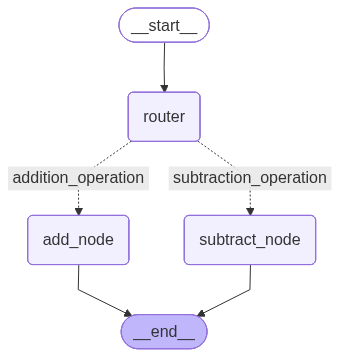

In [16]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
result = app.invoke({"number1": 10, "number2": 5, "operation": "+"})

print(result["finalNumber"])

15


In [18]:
# Exercise - 4

class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    finalNumber : int
    number3 : int
    number4 : int
    operation2 : str
    finalNumber2 : int



In [20]:
def adder(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]

    return state

def subtractor(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decider1(state:AgentState) -> AgentState:
    """This node will select the mext node of the graph"""

    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"

def adder2(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["finalNumber2"] = state["number3"] + state["number4"]

    return state

def subtractor2(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

def decider2(state:AgentState) -> AgentState:
    """This node will select the mext node of the graph"""

    if state["operation2"] == "+":
        return "addition_operation_2"
    elif state["operation2"] == "-":
        return "subtraction_operation_2"



In [21]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state) 

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state) 

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decider1,

    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")  

graph.add_conditional_edges(
    "router2",
    decider2,

    {
        "addition_operation_2": "add_node2",
        "subtraction_operation_2": "subtract_node2"
    }
)


graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

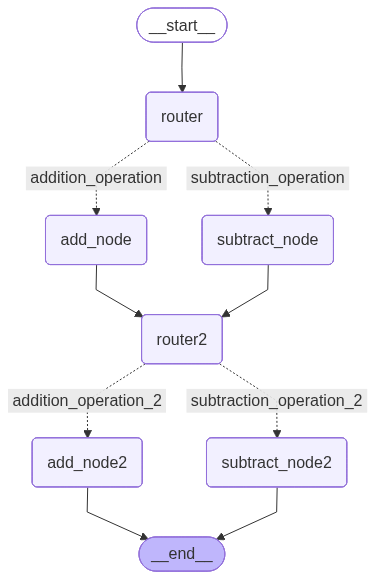

In [22]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
result = app.invoke({"number1": 10, "number2": 5, "operation": "+", "number3": 20, "number4": 8, "operation2": "-"})
print(result)

{'number1': 10, 'number2': 5, 'operation': '+', 'finalNumber': 15, 'number3': 20, 'number4': 8, 'operation2': '-', 'finalNumber2': 12}
